In [1]:
import sys, os, glob, h5py
import time, datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import PyMKID_USRP_functions as PUf
import PyMKID_resolution_functions as Prf
import TimestreamHelperFunctions as Thf

In [2]:
NR13_series = "20220417_091318" ## Al, -26 dBm, 60 sec, shield closed
NR14_series = "20220630_115813" ## Al, -25 dBm, 15 sec, shield closed

Line Delay file:  /data/USRP_Noise_Scans/20220417/20220417_091318/USRP_Delay_20220417_091318.h5
VNA scan file:    /data/USRP_Noise_Scans/20220417/20220417_091318/USRP_VNA_20220417_091318.h5
Timestream files: ['/data/USRP_Noise_Scans/20220417/20220417_091318/USRP_Noise_20220417_091318_delta0.h5']
Summary file:	 /data/USRP_Noise_Scans/20220417/20220417_091318/noise_averages_20220417_091318.h5
[4242.18307] [0.03362206+0.02073509j]
Will separate data into  6000 chunks to achieve the requested 1.00e+02  Hz low  end of the PSD
Additional decimation by 20 needed to achieve the requested 5.00e+04  Hz high end of the PSD
doing additional decimation
sampling frequency plugged into welch is 50000
pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20220417/20220417_091318/USRP_Noise_20220417_091318_delta0.h5 because override=True!
found 53 pulses
chunk length plugged into welch is 500
chunked data into 6000 timestreams
c

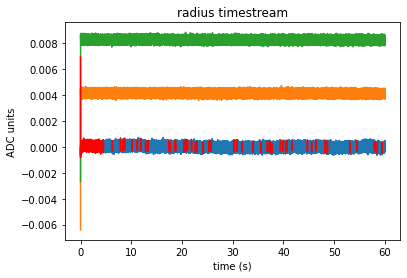

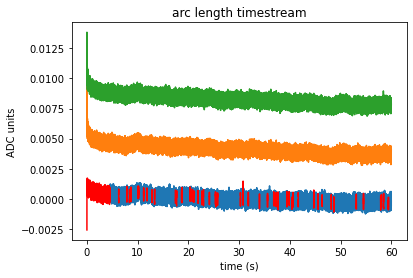

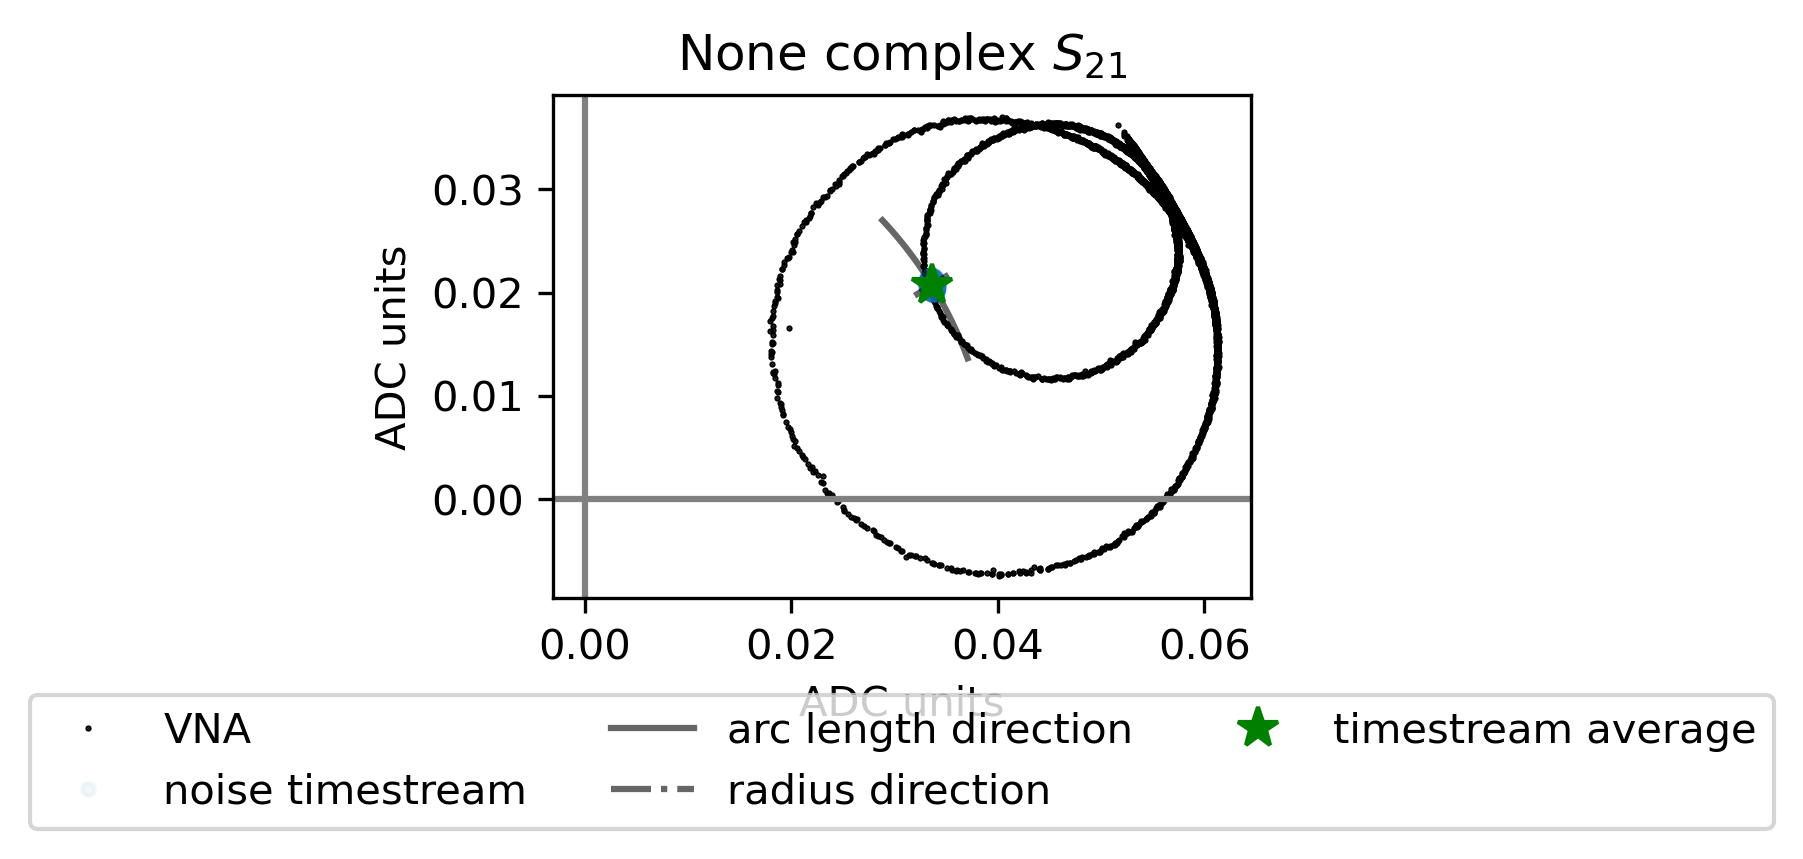

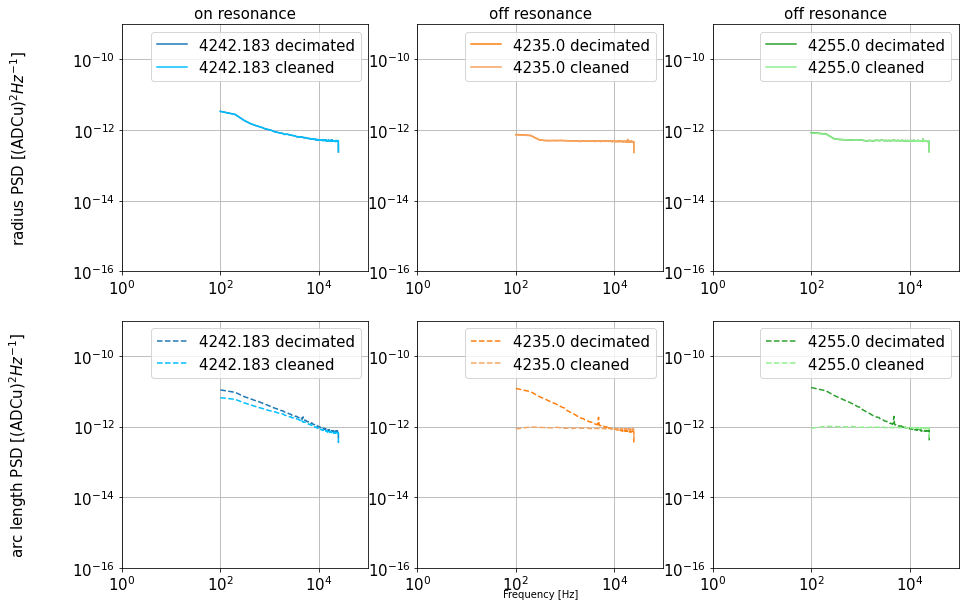

In [3]:
sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(NR13_series, verbose=True)
metadata, avg_frqs, avg_S21s = Thf.UnpackSummary(sum_file)
print(avg_frqs, avg_S21s)
powers_NR13, PSDs_NR13, res_NR13, timestreams_NR13 = Thf.CleanPSDs(tone_files[0], vna_file, f_transient=0.075)

In [4]:
print(PSDs_NR13.keys())

dict_keys(['f', 'radius', 'arc', 'radius uncleaned', 'arc uncleaned', 'fractional radius', 'fractional arc'])


Line Delay file:  None
VNA scan file:    /data/USRP_Noise_Scans/20220630/20220630_115813/USRP_VNA_20220630_115813.h5
Timestream files: ['/data/USRP_Noise_Scans/20220630/20220630_115813/USRP_Noise_20220630_115813_delta0.h5']
Summary file:	 /data/USRP_Noise_Scans/20220630/20220630_115813/noise_averages_20220630_115813.h5
Will separate data into  1500 chunks to achieve the requested 1.00e+02  Hz low  end of the PSD
Additional decimation by 20 needed to achieve the requested 5.00e+04  Hz high end of the PSD
doing additional decimation
sampling frequency plugged into welch is 50000
pulse time data already exists! If you set override=False, nothing will happen.
saving pulse time data to /data/USRP_Noise_Scans/20220630/20220630_115813/USRP_Noise_20220630_115813_delta0.h5 because override=True!
found 4 pulses
chunk length plugged into welch is 500
chunked data into 1500 timestreams
computed electronics basis
cleaning...
(2, 692000)
(1, 692000)
(1, 692000)
(2, 692000)
(1, 692000)
(1, 692000)
sa

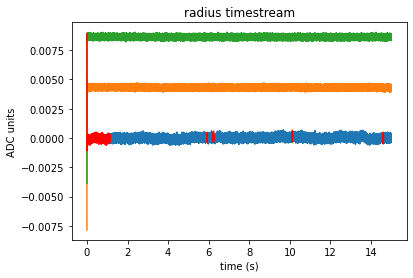

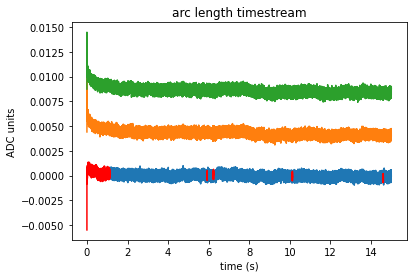

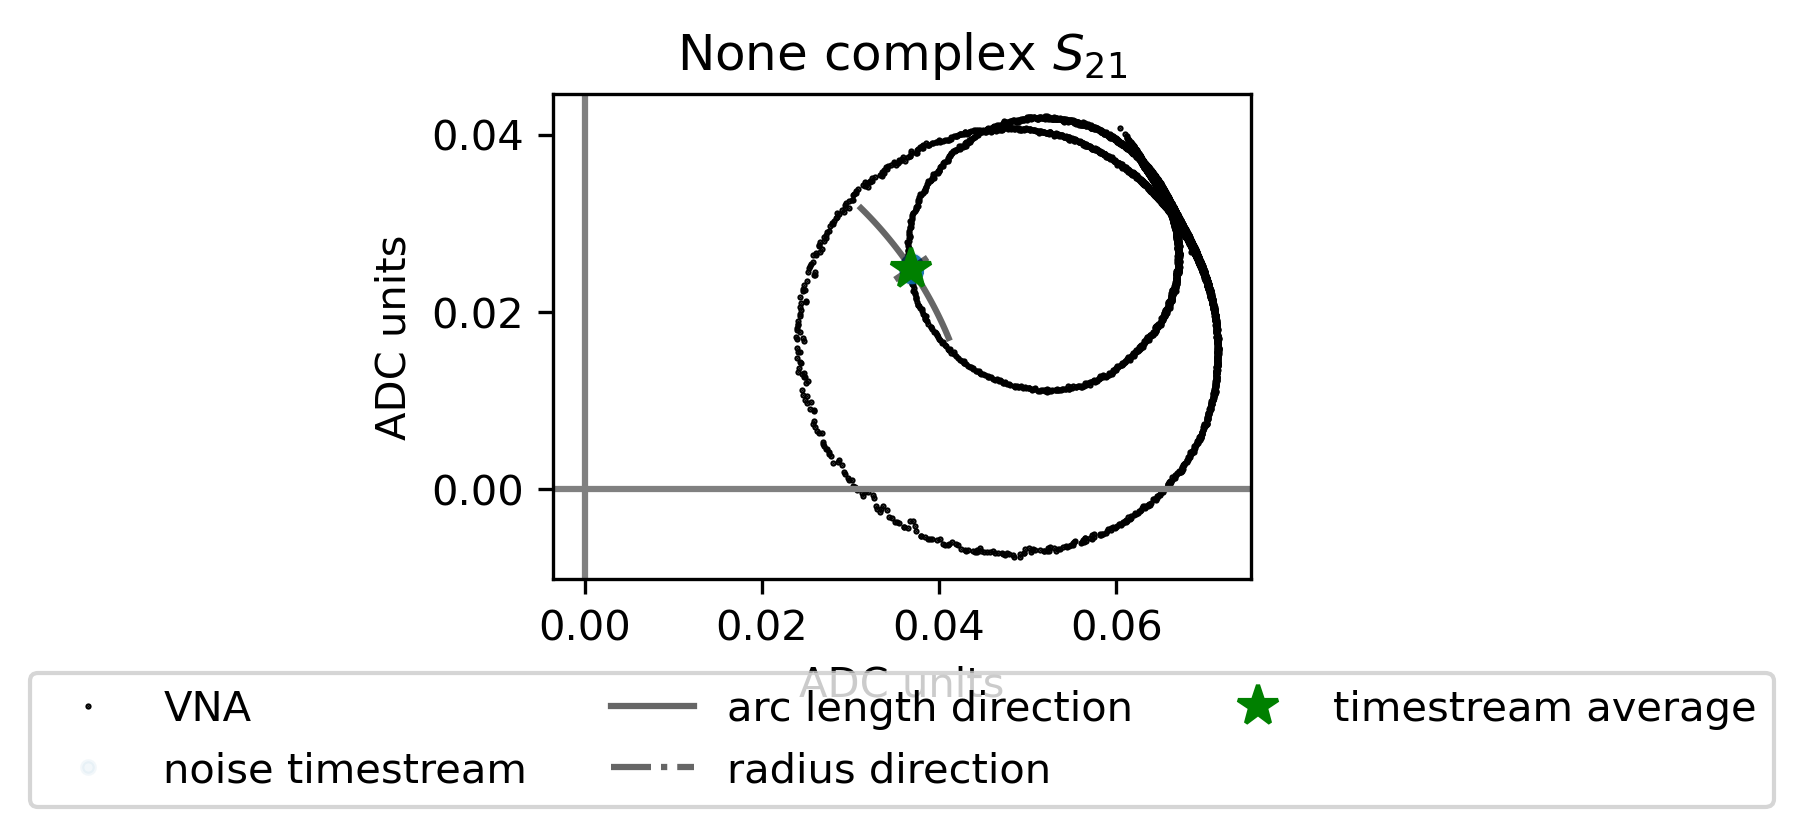

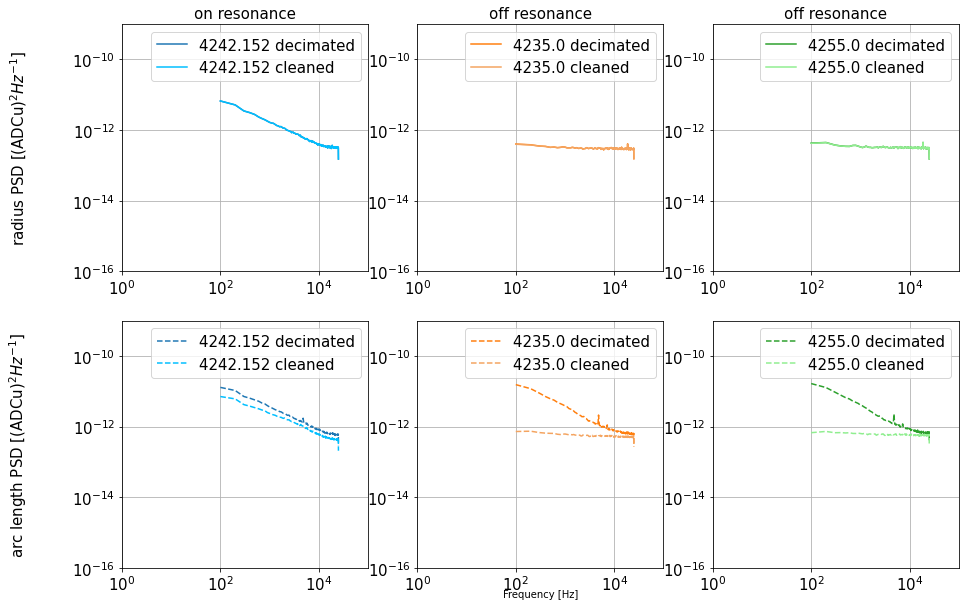

In [5]:
sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(NR14_series, verbose=True)
metadata, avg_frqs, avg_S21s = Thf.UnpackSummary(sum_file)
powers_NR14, PSDs_NR14, res_NR14, timestreams_NR14 = Thf.CleanPSDs(tone_files[0], vna_file, f_transient=0.075)

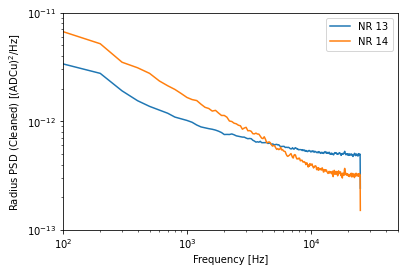

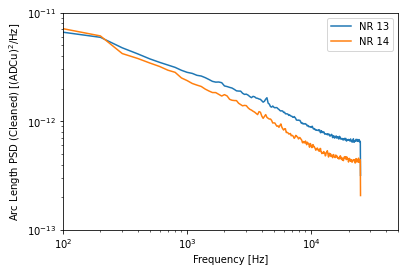

In [9]:
fHz_range = [1e2,5e4]
e_b_PSDrange = [1e-13,1e-11]

fga = plt.figure()
axa = fga.gca()

axa.set_xlabel("Frequency [Hz]")
axa.set_ylabel(r"Radius PSD (Cleaned) [(ADCu)$^2$/Hz]")
axa.set_xlim(fHz_range)
axa.set_ylim(e_b_PSDrange)
axa.set_xscale('log')
axa.set_yscale('log')

fgb = plt.figure()
axb = fgb.gca()

axb.set_xlabel("Frequency [Hz]")
axb.set_ylabel(r"Arc Length PSD (Cleaned) [(ADCu)$^2$/Hz]")
axb.set_xlim(fHz_range)
axb.set_ylim(e_b_PSDrange)
axb.set_xscale('log')
axb.set_yscale('log')

axa.plot(PSDs_NR13["f"],PSDs_NR13['radius'][:,0],label="NR 13")
axb.plot(PSDs_NR13["f"],PSDs_NR13['arc'][:,0],label="NR 13")
axa.plot(PSDs_NR14["f"],PSDs_NR14['radius'][:,0],label="NR 14")
axb.plot(PSDs_NR14["f"],PSDs_NR14['arc'][:,0],label="NR 14")

axa.legend(loc='best')
axb.legend(loc='best')